In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

https://www.altexsoft.com/blog/business/customer-churn-prediction-for-subscription-businesses-using-machine-learning-main-approaches-and-models/

Churn rates do correlate with lost revenue and increased acquisition spend.In addition, they play a more nuanced role in a company’s growth potentia.
The expert concludes that companies with high churn rates aren’t only failing to deliver in their relationships with ex-customers but also damage their future acquisition efforts by creating negative word-of-mouth around their products.

And now imagine a company that has been gathering customer data for a while, so it can use it to identify behavior patterns of potential churners, segment these at-risk customers, and take appropriate actions to gain back their trust.    

Subscription-based businesses leverage ML for predictive analytics to find out which current users aren’t fully satisfied with their services and address their issues when it’s not too late. ML-based software allows customer success managers to define which customers they should contact. In other words, employees can be sure they’re speaking with the right customers at the right time.

CRM systems (including sales and customer support records)
Analytics services (e.g., Google Analytics, AWStats, CrazyEgg)
Feedback on social media and review platforms
Feedback provided on request for your organization, etc

customer demographic features that contain basic information about a customer (e.g., age, education level, location, income)
user behavior features describing how a person uses a service or product (e.g., lifecycle stage, number of times they log in into their accounts, active session length, time of the day when a product is used actively, features or modules used, actions, monetary value)
support features that characterize interactions with customer support (e.g., queries sent, number of interactions, history of customer satisfaction scores)
contextual features representing other contextual information about a customer.

We not only track usage data (e.g., publishing a blog post, editing a deal’s projected closed value, or sending an email) but outcome data (e.g., number of click on an email, number of views on a blog post, dollar value of deals closed during a quarter.) It’s important to understand not just how your customers are using your product but what results they’re seeing. If customers aren’t generating value from the product, we typically see an increase in the likelihood of churn.


feauture engineer:
Permutation importance is one of the ways of defining feature importance – an impact a feature makes on the predictions. It’s calculated on models that have already been trained. This is how permutation importance is done: A data scientist changes the order of data points in a single column, feeds the model with the resulting dataset, and defines to what extent that change decreases its accuracy. Features that have the biggest influence on results are the most important.
Another way to do permutation importance is to remove a feature from a dataset and retrain the model.
https://www.kaggle.com/dansbecker/permutation-importance

Customer segmentation.:
Customer segmentation. Growing companies and those expanding their product range usually segment their customers using previously defined and selected features. Customers can be divided into subgroups based on their lifecycle stage, needs, used solutions, level of engagement, monetary value, or basic information. Since every customer category shares common behavior patterns, it’s possible to increase prediction accuracy through the use of ML models trained specifically on datasets representing each segment.
Customer lifecycle stage.Customers in onboarding don’t usually display the same value metrics as those customers who have been using HubSpot for greater than a year. Thus, a model trained on customers older than one year may work really great for those customers, but not be accurate when applied to customers still in onboarding

How to evaluate the performance:
Machine learning engineer at Spotify, Guilherme Dinis, Jr., in his master’s thesis, studied the behavior of new Spotify users registered to a free plan to define whether they leave or remain active during the second week after their registration.
He chose the first week of usage as the event history. To classify users as churners and active users Guilherme checked if there was any streaming activity in the second week. If users continued listening to music, they were classified as non-churners.

Modeling and testing:
Classic machine learning models are commonly used for predicting customer attrition, for example, logistic regression, decision trees, random forest, and others.
Alex Bekker from ScienceSoft suggests using Random Forest as a baseline model, then “the performance of such models as XGBoost, LightGBM, or CatBoost can be assessed.” 
Gradient boosting is an algorithm consisting of a group of weaker models (trees), which sums up their estimates to predict a target variable with more accuracy.


## Introduction to Churn Prediction in Python:https://www.datascience.com/blog/churn-prediction-python

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# ROC curve and AUC
#In this case, we are printing the “AUC” or Area Under the Curve from the ROC curve, 
#which is a common approach to evaluate the binary classifier performance.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)

In [10]:
## Stratified Sampling
## The most common approach to train machine learning models is to randomly sample the data in various cross-validation sets. 
## This approach has proven to be very productive as long as the data labels are relatively balanced. 
## However, when random sampling is applied to an unbalanced dataset, the imbalance spreads to the sampling. 
## As a result, the predictive model would have a hard time finding a pattern to distinguish and setting boundaries between 
## the two classes simply because one class is underrepresented to the model.

## Stratified sampling can help overcome this problem. In stratified sampling, the label of each datapoint is taken into account 
## during the sampling process, and as a result any imbalances between existing classes can be preserved for cross-validation.

#This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. 
#The folds are made by preserving the percentage of samples for each class.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1,1],[2,2],[3,3]])
y = np.array([0, 0, 1, 1,1,1,1])
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [3 1 4 6] TEST: [5 0 2]
TRAIN: [5 1 2 3] TEST: [0 6 4]
TRAIN: [5 6 4 0] TEST: [3 2 1]


## Contingency/Confusion Matrix

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

def printContingencyTable(y_test, y_pred, imagename):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confusion_matrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('Churned')
    plt.xlabel('Predicted')
    plt.savefig(imagename)

    plt.show()
    print(confusion_matrix)

# Hands-on: Predict Customer Churn: https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266

In [71]:
!pwd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
# Loading the CSV with pandas
data = pd.read_csv('./Telco-Customer-Churn.csv')
data.head(5)

/Users/zhe.zhang/Desktop/working


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Load 

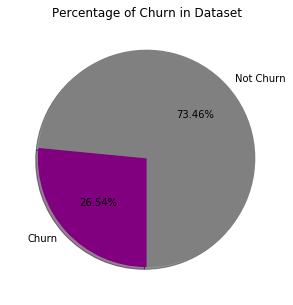

In [82]:
sizes = data['Churn'].value_counts(sort=True)
colors = ["grey","purple"] 
labels = ['Not Churn','Churn']
plt.pie(sizes, labels=labels, colors=colors, autopct='%2.2f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

### Feature engineering

In [73]:
#Dropping irrelevant data: There may be data included that is not needed to improve our results. 
#Best is that to identify by logic thinking or by creating a correlation matrix.

data.drop(["customerID"],axis=1,inplace=True)

#Missing Values

#Converting Numerical Features From Object
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

#Categorical data into numerical data
#By using the Pandas function “get_dummies()” two columns will replace the gender column with “gender_Female” and “gender_Male”.

#Splitting the dataset
data["Churn"] = data["Churn"].astype(int)
Y = data["Churn"].values #transform pandas series to numpy array
X = data.drop(labels = ["Churn"],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

from sklearn import metrics
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

KeyError: "['customerID'] not found in axis"

In [196]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv')
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['churn'], dtype='object'),
 dtype('int64'): Index(['account length', 'area code', 'number vmail messages',
        'total day calls', 'total eve calls', 'total night calls',
        'total intl calls', 'customer service calls'],
       dtype='object'),
 dtype('float64'): Index(['total day minutes', 'total day charge', 'total eve minutes',
        'total eve charge', 'total night minutes', 'total night charge',
        'total intl minutes', 'total intl charge'],
       dtype='object'),
 dtype('O'): Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')}

Churn Percentage = 14.491449144914492%


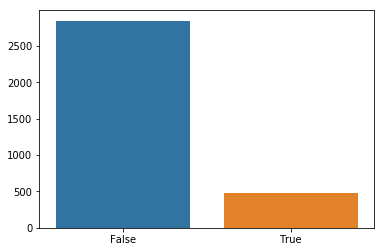

In [115]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.size / df["churn"].shape[0]) * 100 )+"%")

#Conclusion 1 = Imbalanced data - Lesser datapoints in True Churn category

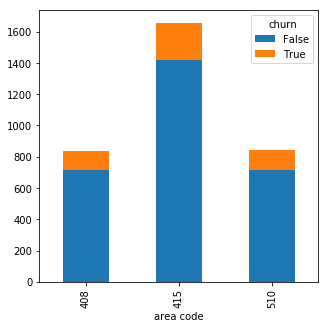

In [116]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Feature eng


In [167]:
#Handle Categorical Cols - Label Encode
from sklearn.preprocessing import OneHotEncoder
label_encoder = preprocessing.LabelEncoder()

In [176]:
# LabelEncoder

df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [177]:
#transfer to np.array
y = df['churn'].as_matrix().astype(np.int)

In [178]:
# Standardize Feature Matrix values
df.drop(["phone number","churn"], axis = 1, inplace=True)
X = df.as_matrix().astype(np.float)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

## build ML models

In [ ]:
#build a function to use stratifiedKFold run several different models
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold: 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs) #assign different models
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [ ]:
#run different models
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

## Confusion Matrices for various models¶


In [191]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

numpy.ndarray

In [ ]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

## Final Model Selection¶

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

In [ ]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

# Building an Employee Churn Model in Python to Develop a Strategic Retention Plan :
## https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
## https://www.kaggle.com/hamzaben/employee-churn-model-w-strategic-retention-plan

In [198]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
#from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [227]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [266]:
df_sourcefile = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_HR = df_sourcefile.copy()

In [208]:
# Let’s break down the columns by their type (i.e. int64, float64, object):
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

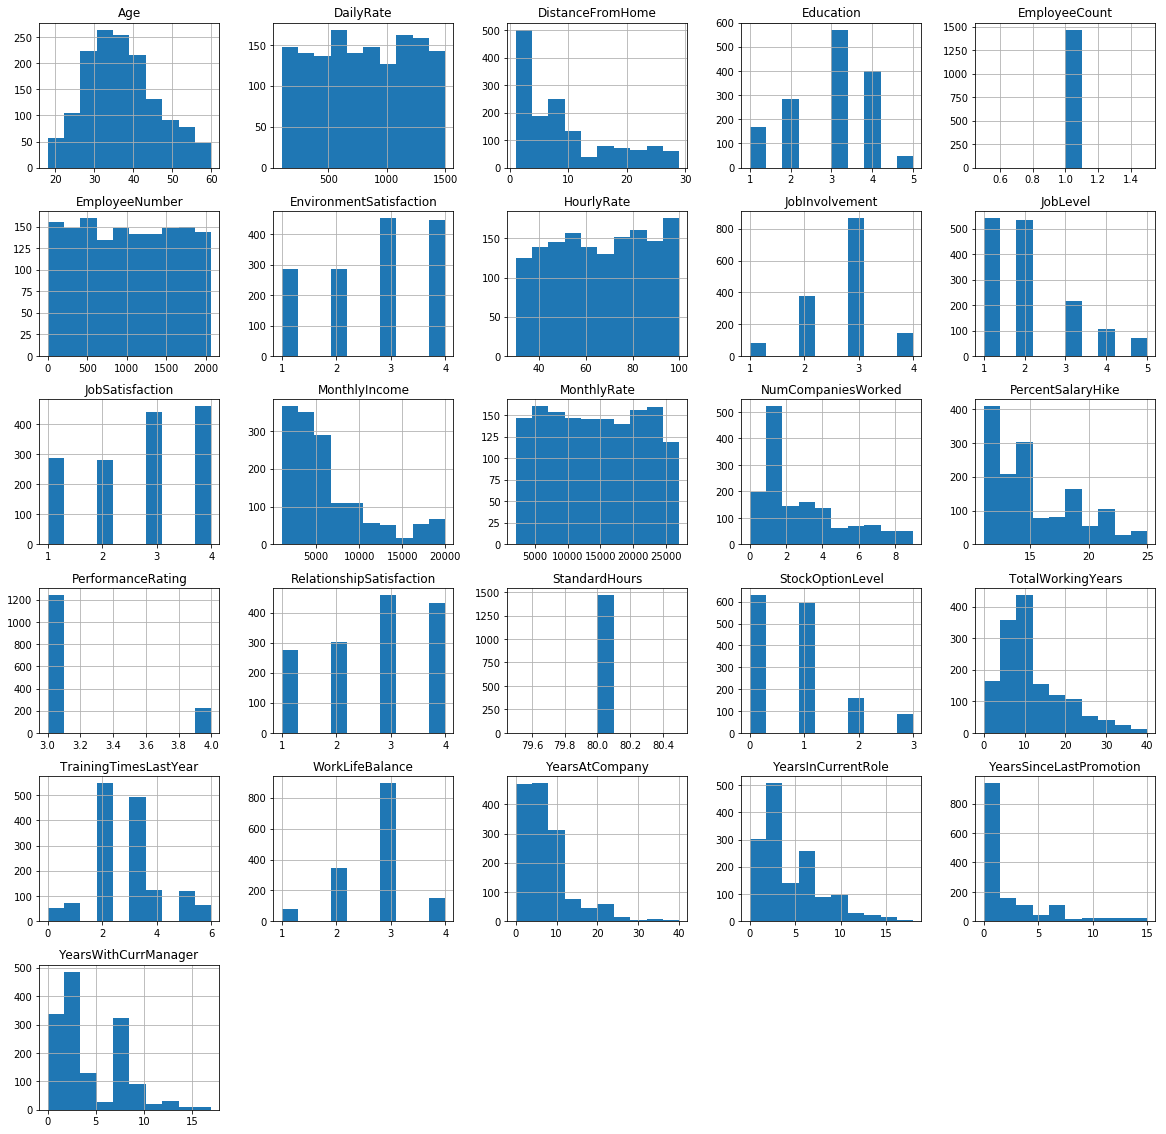

In [209]:
#plot hist matrix on all variables
df_HR.hist(figsize=(20,20))
plt.show()

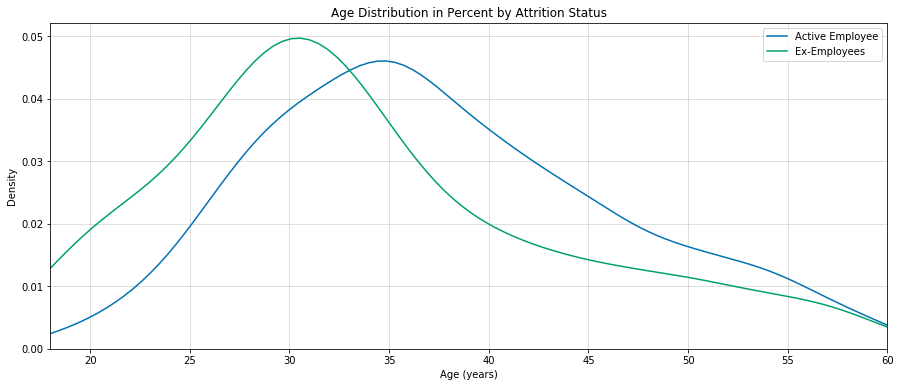

In [210]:
#KDE distribution
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

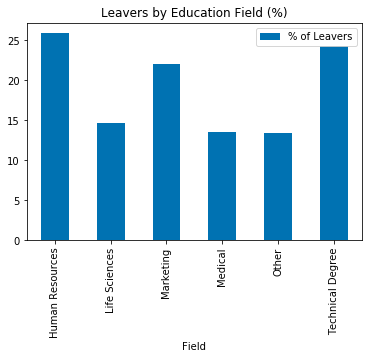

In [223]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
#df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

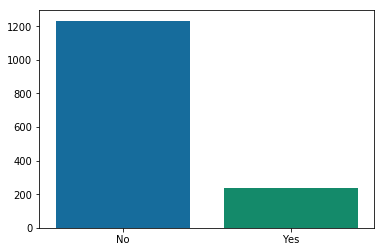

In [242]:
y = df_HR['Attrition'].value_counts()
sns.barplot(y.index, y.values)

#As shown on the chart above, we see this is an imbalanced class problem. 
#Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%
#Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 
#We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [250]:
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df_HR_trans.corr()["Target"].sort_values()[::-1]

Target                      1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Target, dtype: float64

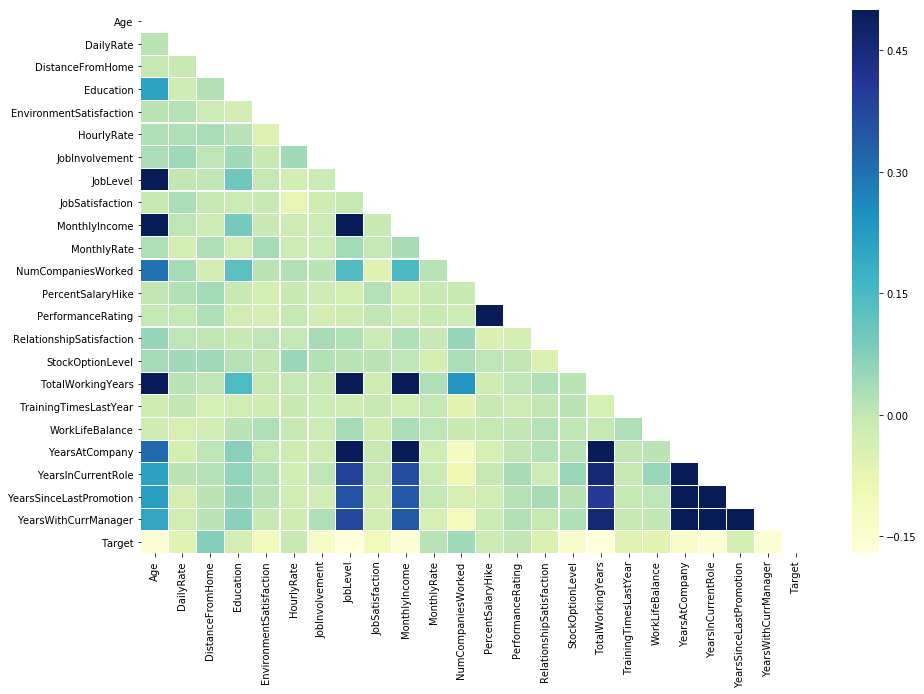

In [258]:
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

## Encoding

In [286]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count))
df_HR.shape

0 columns were label encoded.


(1470, 35)

In [287]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,3.690476,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,2.261905,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,1.785714,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,1.071429,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [288]:
df_HR = pd.get_dummies(df_HR, drop_first=True)
df_HR.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3.690476,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2.261905,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1.785714,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.071429,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


## Feature Scaling

In [289]:
#not good scaler, should use previously preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]]) 
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


## split test and train

In [296]:
target = df_HR['Attrition'].copy()
df_HR.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber','StandardHours', 'Over18'], axis=1, inplace=True)
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=target to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  

## build and train the models

In [292]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [293]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [297]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


In [299]:
acc_results

[array([0.78378378, 0.82882883, 0.66363636, 0.83636364, 0.70909091,
        0.73636364, 0.75454545, 0.72727273, 0.67272727, 0.73636364]),
 array([0.86486486, 0.85585586, 0.89090909, 0.8       , 0.9       ,
        0.79090909, 0.84545455, 0.9       , 0.86363636, 0.81818182]),
 array([0.85585586, 0.85585586, 0.89090909, 0.78181818, 0.89090909,
        0.79090909, 0.82727273, 0.89090909, 0.87272727, 0.79090909]),
 array([0.85585586, 0.87387387, 0.87272727, 0.78181818, 0.88181818,
        0.78181818, 0.82727273, 0.9       , 0.84545455, 0.8       ]),
 array([0.77477477, 0.77477477, 0.80909091, 0.67272727, 0.80909091,
        0.73636364, 0.77272727, 0.80909091, 0.74545455, 0.71818182]),
 array([0.72072072, 0.72072072, 0.61818182, 0.7       , 0.68181818,
        0.68181818, 0.63636364, 0.67272727, 0.68181818, 0.7       ])]

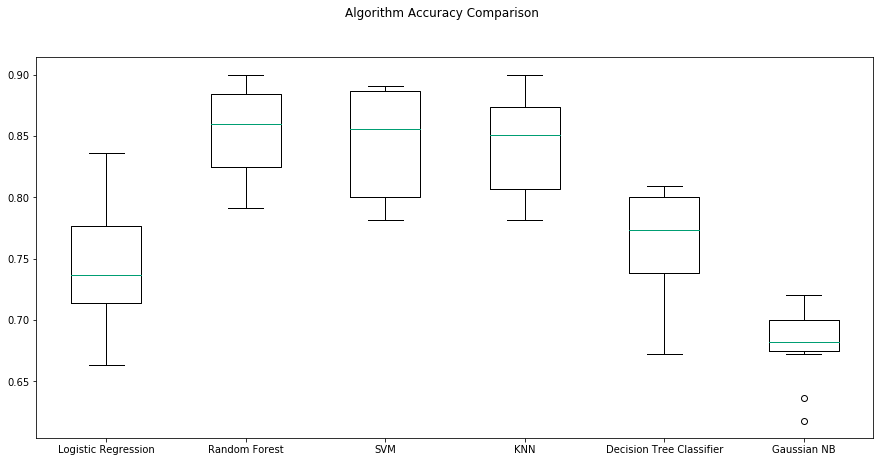

In [317]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. 
#The AUC represents a model’s ability to discriminate between positive and negative classes. 
#An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Decision Tree Classifier'),
 Text(0, 0, 'Gaussian NB')]

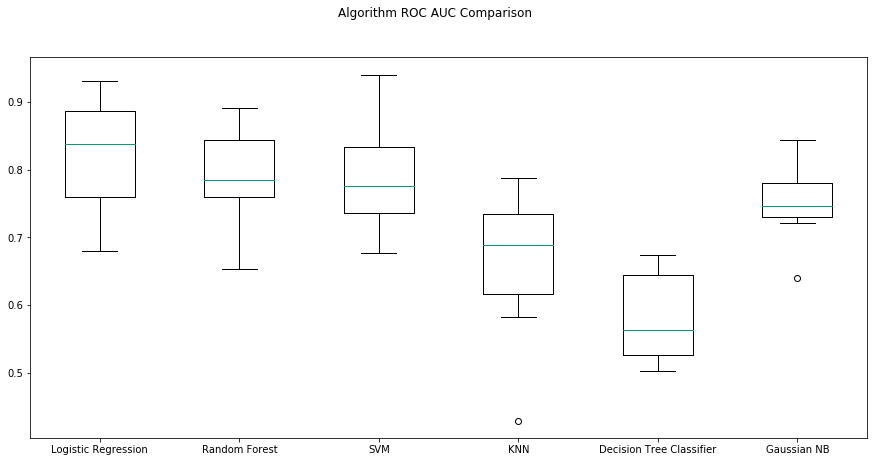

In [318]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
#plt.show()

## Models Fine-tuning

In [320]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_
print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.05099999999999999, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.05099999999999999}
best score: 0.8180815631000706


Text(0.5, 257.44, 'Predicted label')

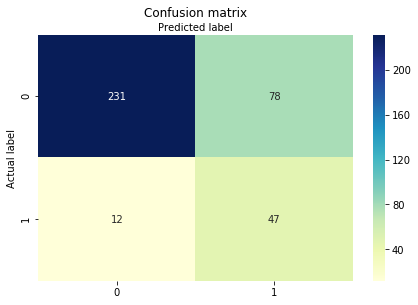

In [326]:
## Confusion Matrix and create heatmap

cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[1,0] # name  of classes


fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one

In [327]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       309
         1.0       0.38      0.80      0.51        59

   micro avg       0.76      0.76      0.76       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.76      0.78       368



In [328]:
#The resulting AUC score is higher than that best score during the optimisation step. 
#Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


In [329]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175], #number of trees in the foreset
              'min_samples_split':[2,4,6,8,10], # min number of data points placed in a node before the node is split
              'min_samples_leaf': [1, 2, 3, 4], #min number of data points allowed in a leaf node
              'max_depth': [5, 10, 15, 20, 25]} #max number of levels in each decision tree
#max_features = max number of features considered for splitting a node
#bootstrap = method for sampling data points (with or without replacement)

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 75}
best score: 0.7956083711198764


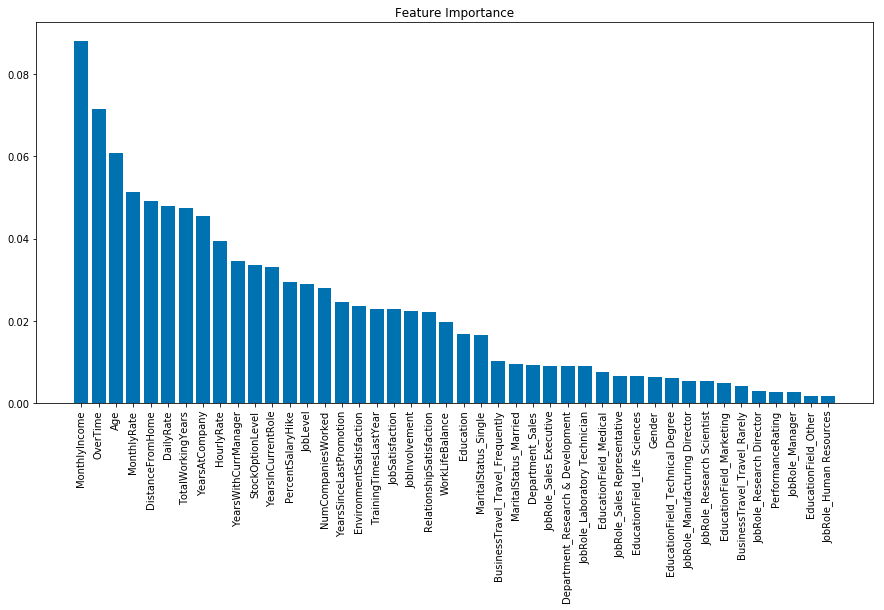

In [331]:
#feature importance
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [347]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = [feat, coeff]
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.088179
1,OverTime,0.071542
2,Age,0.060858
3,MonthlyRate,0.051225
4,DistanceFromHome,0.049128
5,DailyRate,0.047802
6,TotalWorkingYears,0.047392
7,YearsAtCompany,0.045513
8,HourlyRate,0.039374
9,YearsWithCurrManager,0.034526


Text(0.5, 257.44, 'Predicted label')

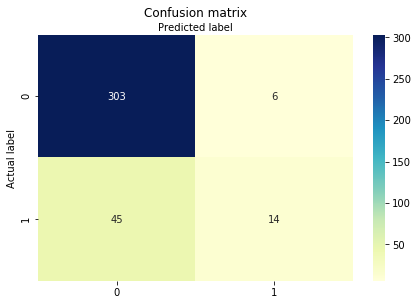

In [346]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [348]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

Accuracy of RandomForest Regression Classifier on test set: 86.14
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       309
         1.0       0.70      0.24      0.35        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368



In [349]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.818


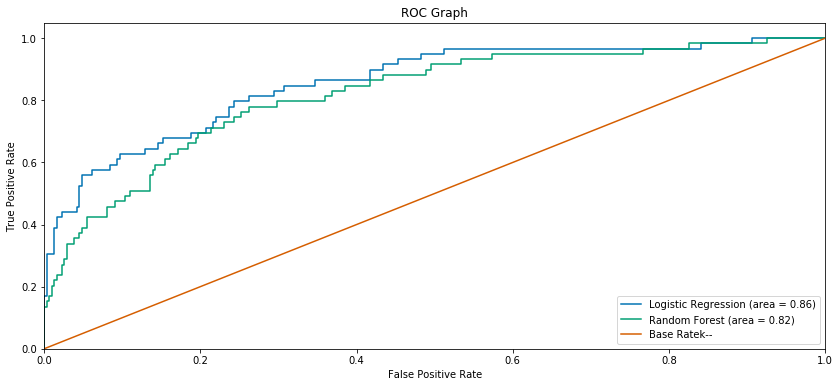

In [350]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Predicting Employee Churn in Python: https://www.datacamp.com/community/tutorials/predicting-employee-churn-python

In [352]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

In [353]:
data=pandas.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<BarContainer object of 2 artists>

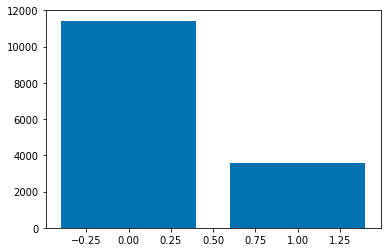

In [360]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values,left_count['satisfaction_level'])

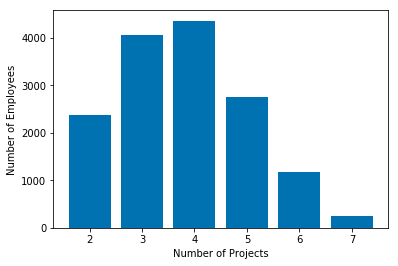

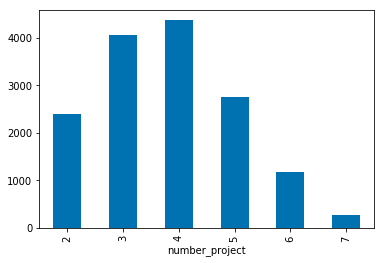

In [374]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

#can by realized by another way:
df_group = data.groupby('number_project')
df_group["satisfaction_level"].count().plot(kind="bar")

0 number_project
1 time_spend_company
2 Work_accident
3 left
4 promotion_last_5years
5 Departments 
6 salary


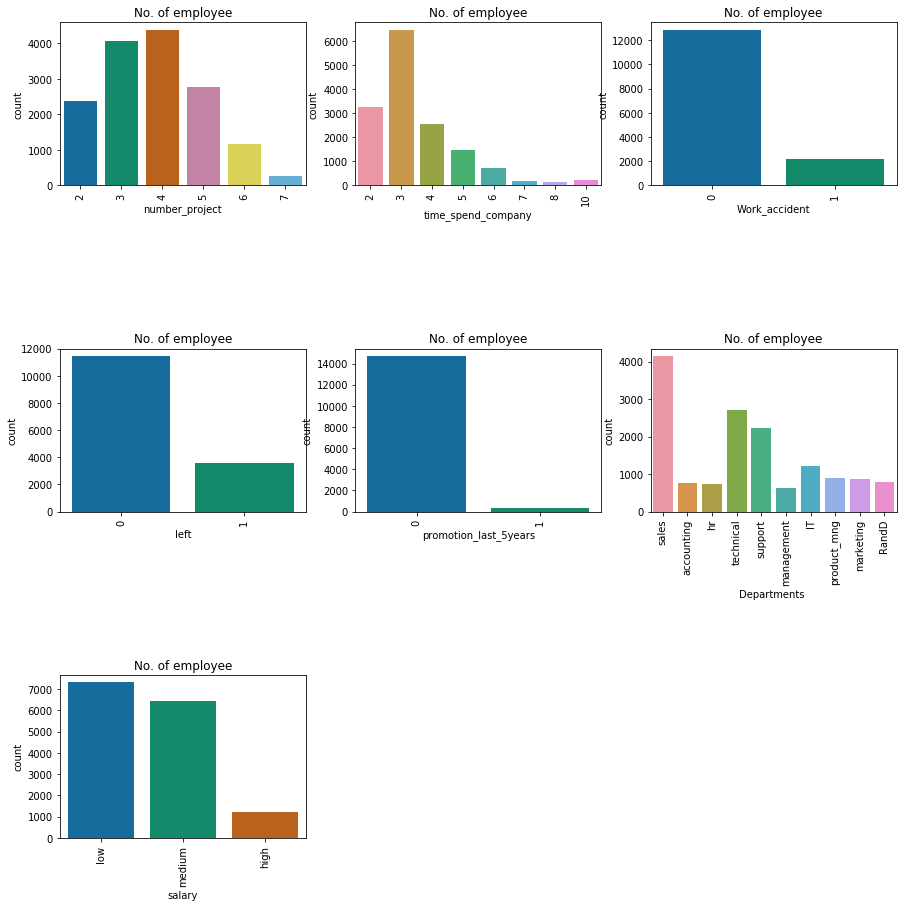

In [377]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    print(i,j)
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

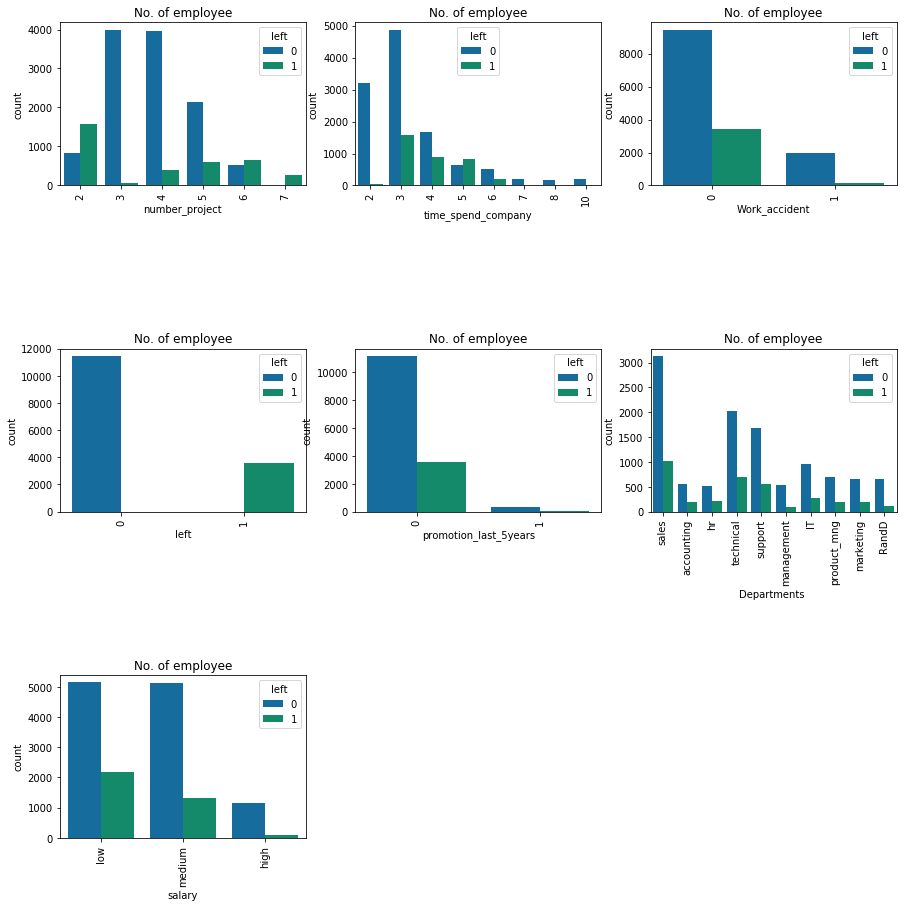

In [379]:
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [380]:
from sklearn.cluster import KMeans
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

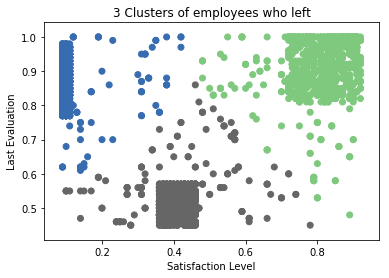

In [383]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
left_emp.head()
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Predicting customer churn with Python: Logistic regression, decision trees and random forests : http://dataskunkworks.com/2018/06/05/predicting-customer-churn-with-python-logistic-regression-decision-trees-and-random-forests/

In [420]:
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [422]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [423]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


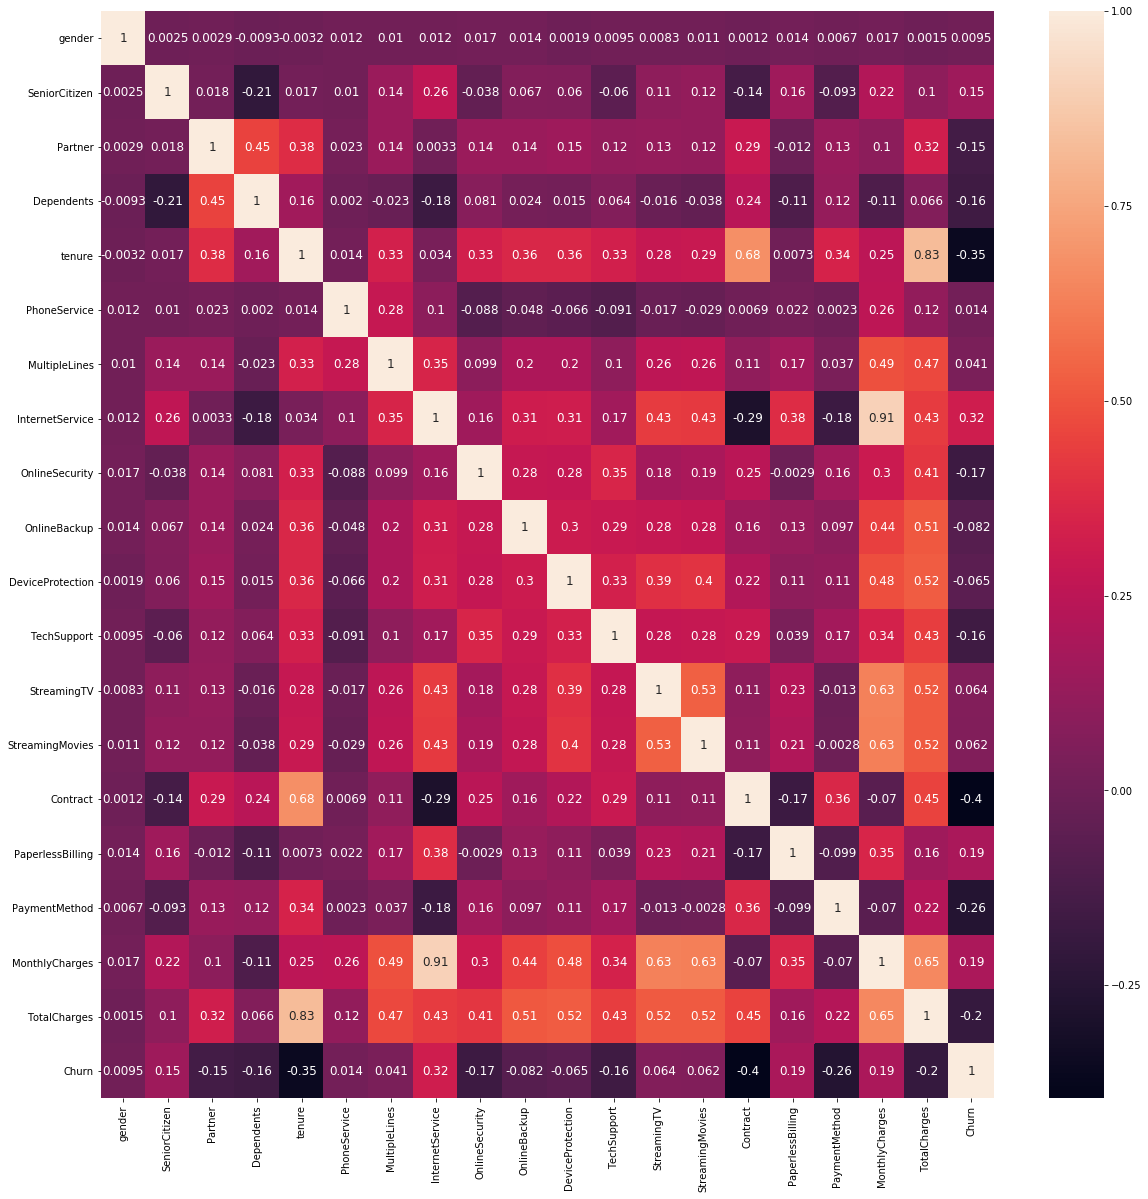

In [424]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [425]:
data.pop('TotalCharges')

from sklearn.model_selection import train_test_split 

y = data['Churn']
data.pop('Churn')
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    )  
 


## Logistic regression

Intercept: [-0.8381386]
Regression: [[ 0.02224057  0.24790851 -0.04242302 -0.17741585 -0.03431695 -0.67566144
   0.2399324   0.6049433  -0.48235339 -0.10043589 -0.09055526 -0.43607596
   0.16802415  0.16000574 -0.65474867  0.2728675  -0.12501687  0.01138272]]
Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1277
           1       0.68      0.55      0.61       484

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



Text(0.5, 15.0, 'Predicted label')

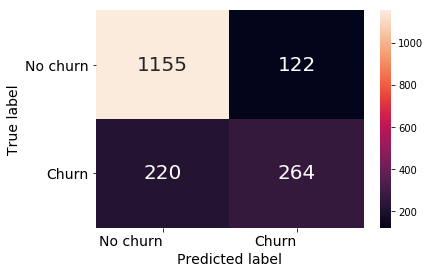

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)
 
test_y_pred = logisticRegr.predict(X_test)

print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

print(classification_report(y_test, test_y_pred))

confusion_matrix = confusion_matrix(y_test, test_y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [ ]:
#We got 81% classification accuracy from our logistic regression classifier. 
#But the precision and recall for predictions in the positive class (churn) are relatively low, 
#which suggests our data set may be imbalanced.

## How to handle imbalanced classes

### Up-sampling the minority class. To balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement:

In [442]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Churn'].value_counts()

KeyError: 'Churn'

In [ ]:
logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

## Area Under ROC Curve (AUROC) represents the likelihood of a model distinguishing observations between two classes. In very simple terms, AUROC gives a single measure of how a model’s true positive rate and false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. 

In [ ]:
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

## Random forests

In [446]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.78
